### Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error

### Import Data

In [2]:
data = pd.read_csv('Housing.csv')

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.describe(include = 'all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [5]:
data.describe(include = 'O')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


### EDA

In [6]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data['price'].value_counts().sort_index()

price
1750000     3
1767150     1
1820000     1
1855000     1
1890000     2
           ..
10850000    1
11410000    1
12215000    1
12250000    2
13300000    1
Name: count, Length: 219, dtype: int64

In [9]:
data['area'].value_counts().sort_index()

area
1650     1
1700     1
1836     1
1905     1
1950     2
        ..
12900    1
12944    1
13200    2
15600    1
16200    1
Name: count, Length: 284, dtype: int64

In [10]:
num_col = data[['price','area']]
cat_col = data.drop(columns = data[['price','area']],axis =1)

### Univariate Analysis

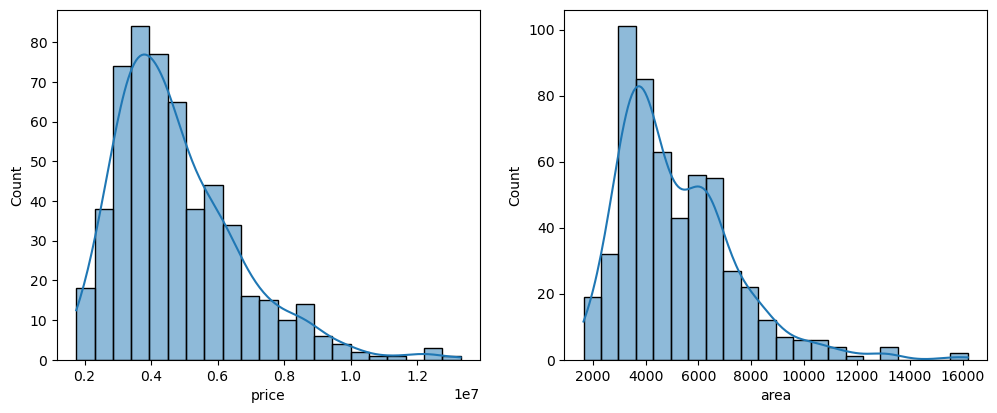

In [11]:
cols = ['price','area']

plt.figure(figsize = (12,10),facecolor = 'white')
plotnumber = 1

for col in cols:
    plotnumber >= 2
    x = plt.subplot(2,2,plotnumber)
    sns.histplot(x = data[col],kde = True)
    plotnumber += 1

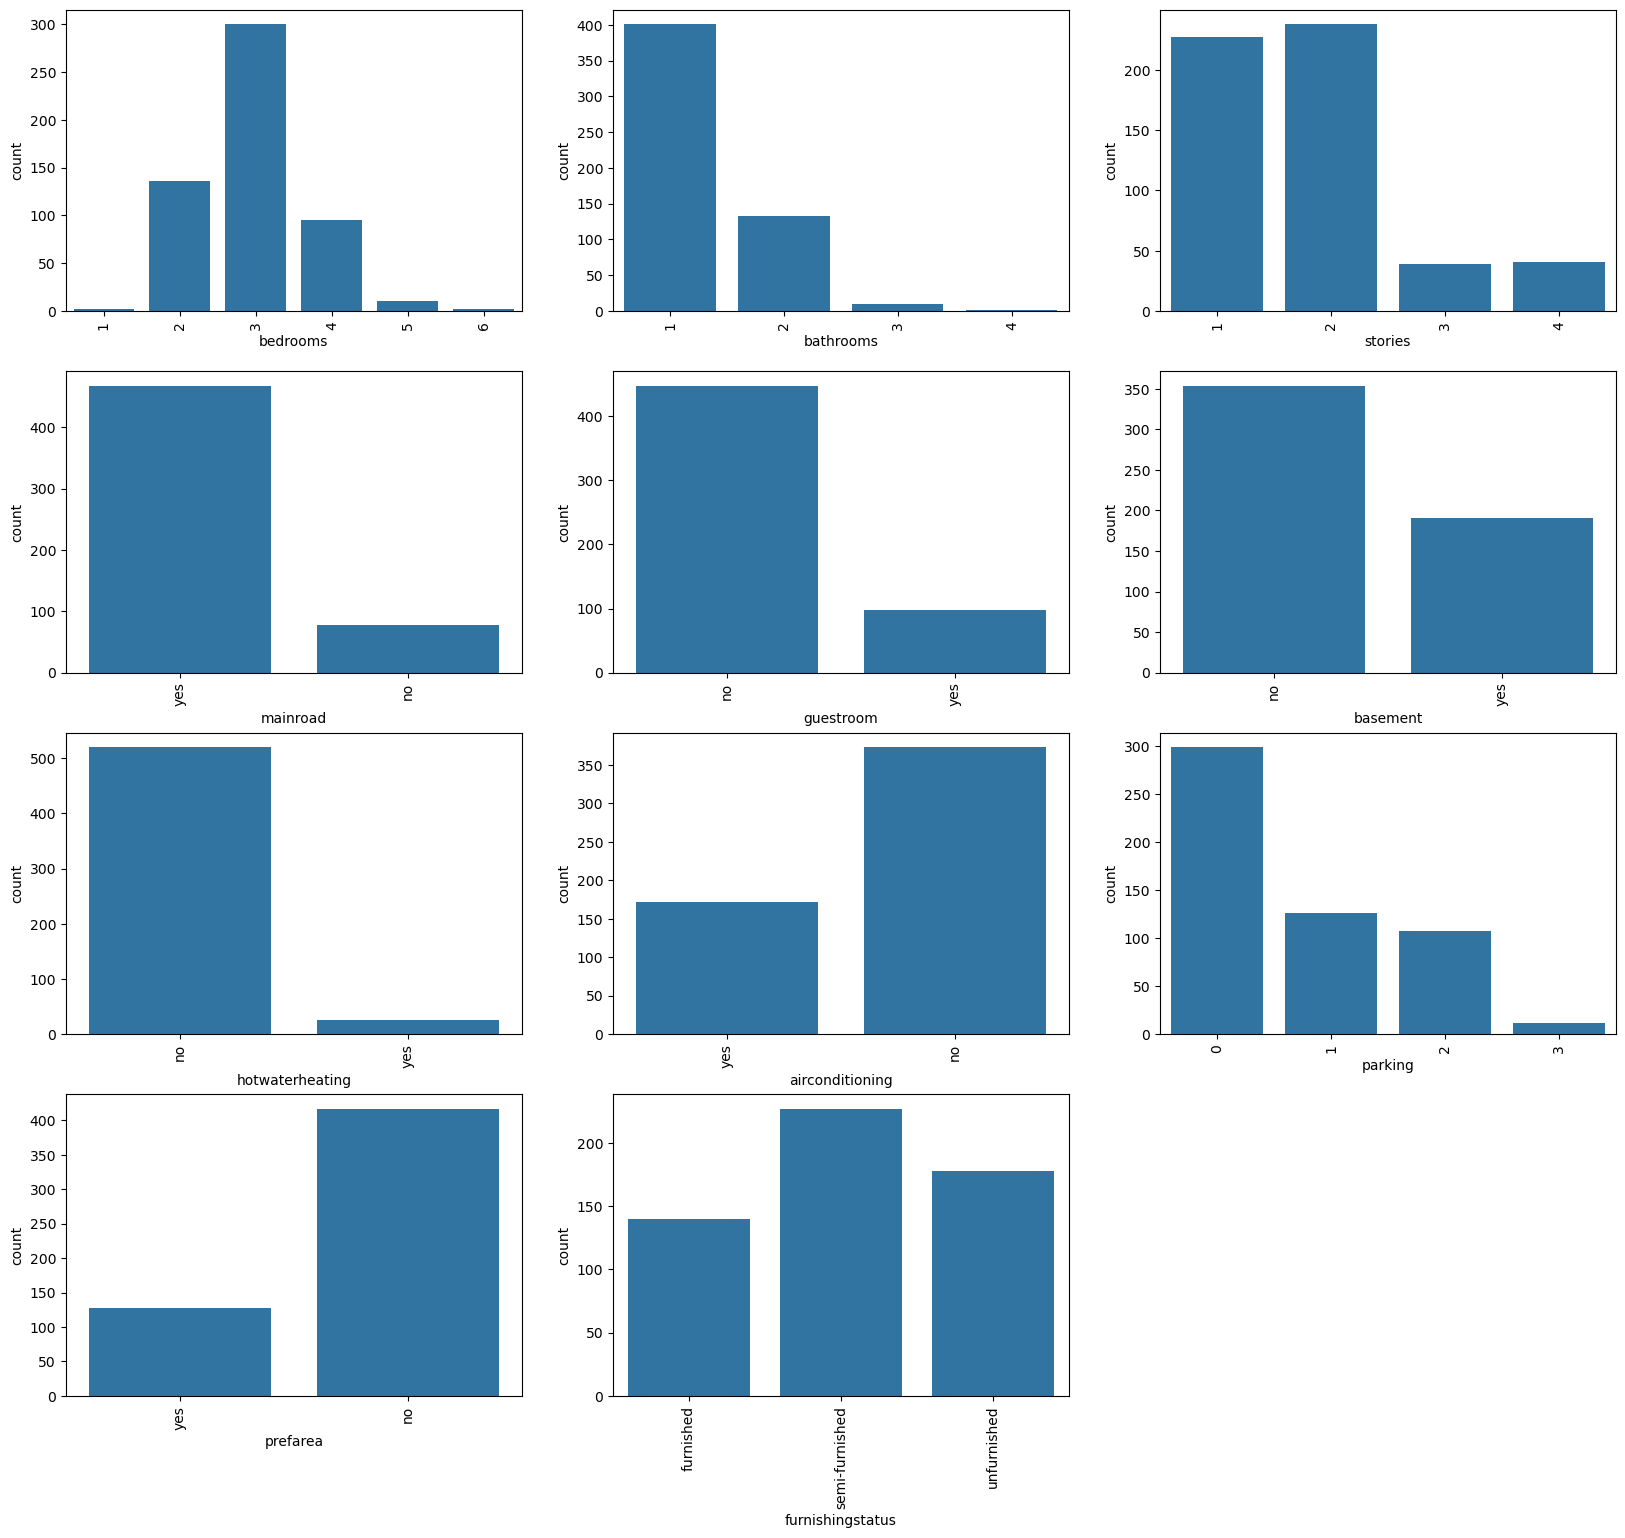

In [12]:
plt.figure(figsize = (20,18) , facecolor = 'white')
plotnumber = 1

for col in cat_col:
  plotnumber >= 12 
  ax = plt.subplot(4,3,plotnumber)
  sns.countplot(x = cat_col[col] )
  plt.xticks(rotation = 'vertical')
  plotnumber += 1

### Bivariate Analysis

<Axes: xlabel='area', ylabel='price'>

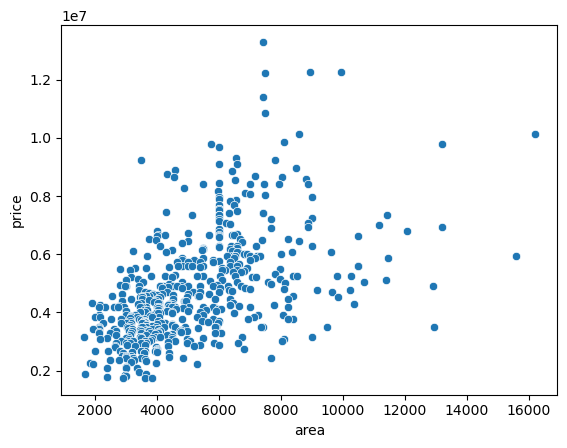

In [67]:
sns.scatterplot(x = data['area'] , y = data['price'] )

### Outlier Detection

<Axes: xlabel='area'>

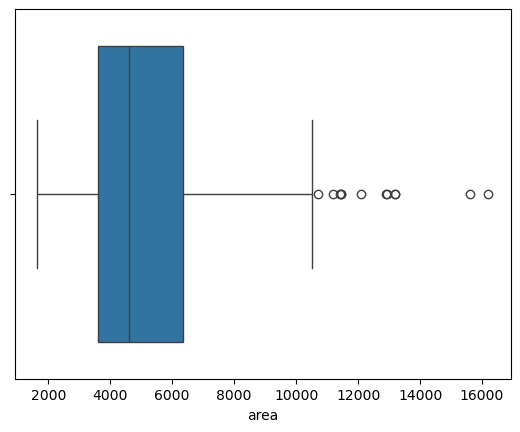

In [14]:
sns.boxplot(x = data['area'])

In [15]:
data_iqr = data.copy()
data_z = data.copy()

### Outlier removal using IQR

In [68]:
q1 = data_iqr['area'].quantile(0.25)
q3 = data_iqr['area'].quantile(0.75)

iqr = q3-q1

upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

median = data_iqr['area'].median()

data_iqr['area'] = data_iqr['area'].apply(lambda x: median if (x < lower or x > upper) else x)

<Axes: xlabel='area'>

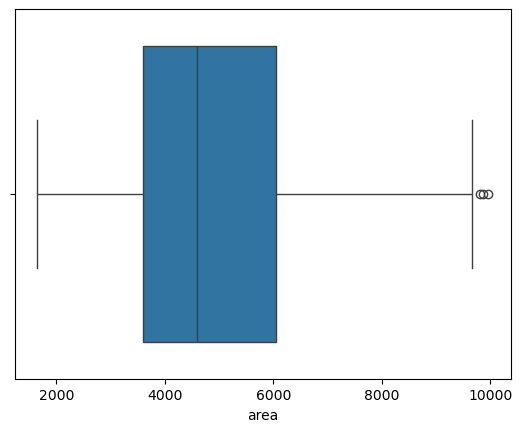

In [69]:
sns.boxplot(x = data_iqr['area'])

### Outlier Removal using Z-score

In [70]:
mean = data_z['area'].mean()
std = data_z['area'].std()

z_score = (data_z['area']-mean)/std

median = data_z['area'].median()

data_z['area'] = data_z['area'].apply(lambda x: median if (abs(x-mean)/std)>3 else x)
    

<Axes: xlabel='area'>

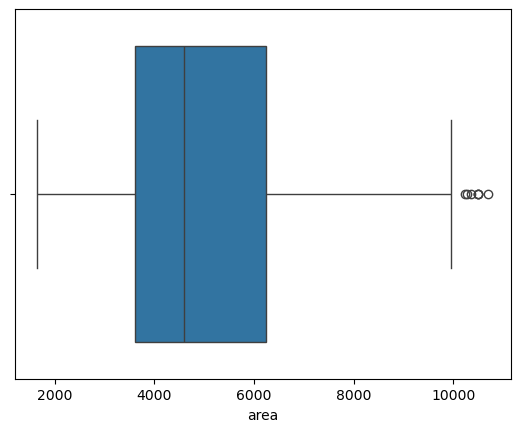

In [71]:
sns.boxplot(x = data_z['area'])

### Encoding

In [72]:
data1 = pd.get_dummies(data_iqr,columns =['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'],drop_first = True).astype(int)
data1

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


<Axes: >

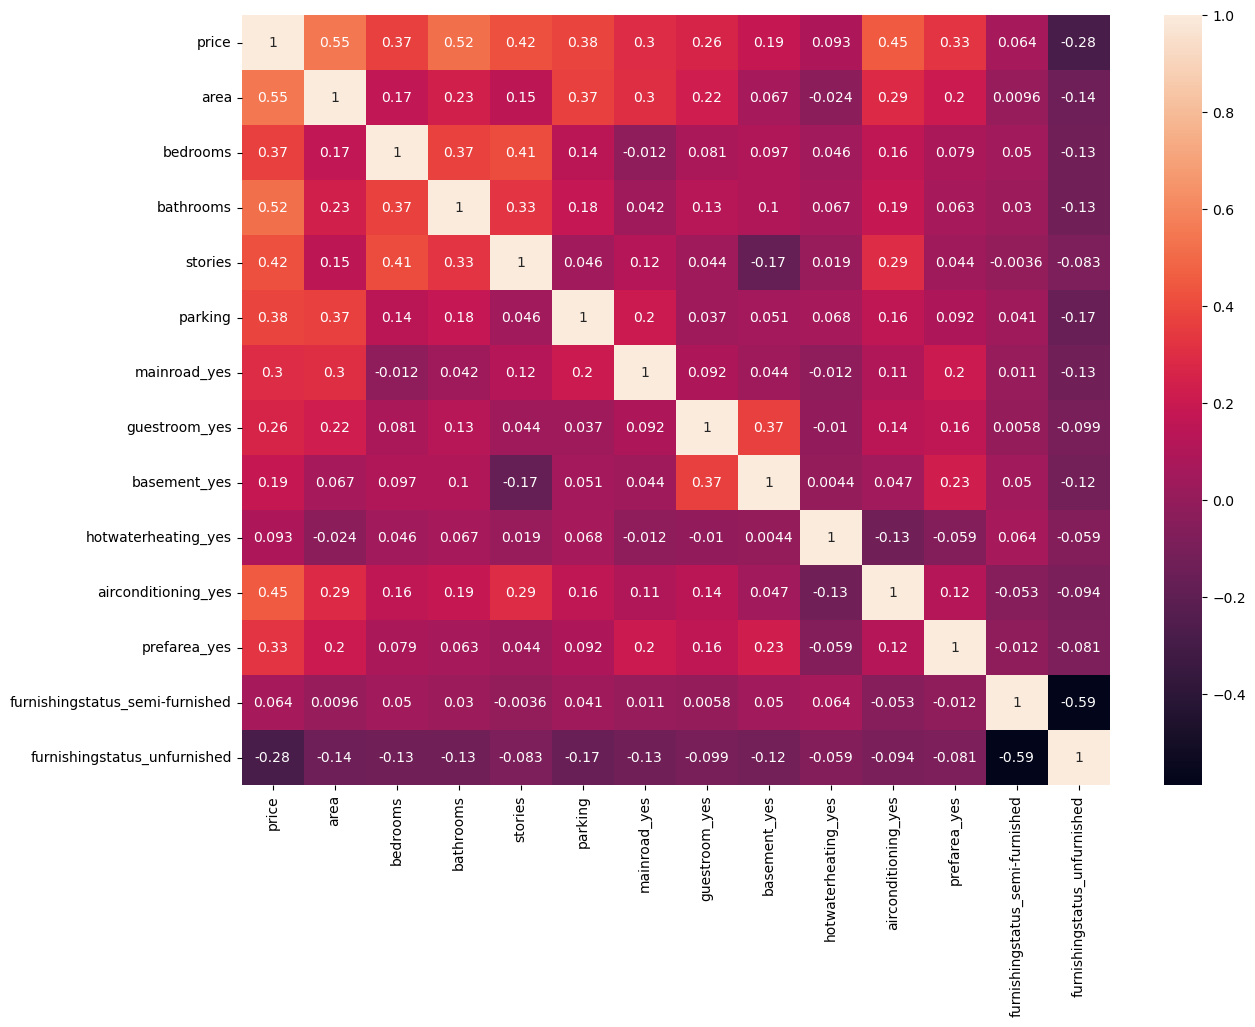

In [73]:
plt.figure(figsize = (14,10))
sns.heatmap(data1.corr(),annot = True)

### Scaling

In [74]:
x = data1.drop(columns =['price'],axis = 1)
x

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [75]:
Y = data1['price']
Y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int32

In [76]:
y = np.log1p(Y)
y

0      16.403275
1      16.321037
2      16.321037
3      16.318175
4      16.250001
         ...    
540    14.414348
541    14.384879
542    14.375127
543    14.375127
544    14.375127
Name: price, Length: 545, dtype: float64

<Axes: xlabel='price'>

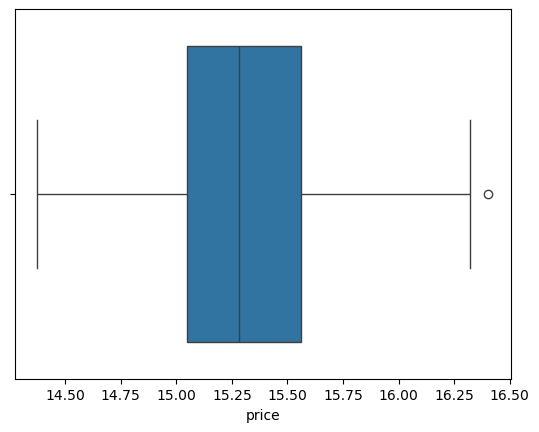

In [78]:
sns.boxplot(x=y)

### Train Test Split

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [80]:
x_train.shape

(436, 13)

In [81]:
x_test.shape

(109, 13)

In [82]:
y_train.shape

(436,)

In [83]:
y_test.shape

(109,)

### Model Creation

### linear regression

In [84]:
LR = LinearRegression()
LR_Model = LR.fit(x_train,y_train)
LR_Model

LinearRegression()

In [34]:
y_pred = LR_Model.predict(x_test)
y_pred

array([15.33858585, 15.80242756, 15.01537222, 15.31921975, 15.04695082,
       15.07495007, 15.51025776, 15.66169843, 14.82313474, 14.86277341,
       16.26896217, 14.8996794 , 14.91931026, 15.04918281, 15.10259443,
       15.28585396, 14.98429825, 15.29872521, 15.23887185, 15.11939693,
       15.4956327 , 15.60740307, 14.88455336, 15.30218998, 15.47211663,
       15.92155379, 14.99238016, 15.39764938, 15.60683089, 15.04578962,
       15.68052952, 14.99757954, 15.68595982, 15.25664096, 15.07632509,
       15.52144654, 15.3626309 , 15.23636609, 14.93397951, 15.27625654,
       15.32488733, 15.03183798, 15.79818165, 15.17338381, 15.15920231,
       15.1880181 , 15.7136446 , 15.21572573, 15.1181313 , 15.01950642,
       15.75485876, 14.88660706, 15.25825377, 15.2717792 , 15.11248703,
       14.87391892, 15.79892727, 14.92286776, 15.27529075, 14.89256751,
       15.32608441, 14.97845654, 15.4005383 , 15.19882693, 15.28398871,
       15.31624428, 15.80563234, 15.05111281, 15.5326069 , 15.62

### Evaluation

In [36]:
mae = mean_absolute_error(y_test,y_pred)
print('mae -',mae)
r2score = r2_score(y_test,y_pred)
print('r2 -',r2score)
rmse =root_mean_squared_error(y_test,y_pred)
print('rmse -',rmse)

mae - 0.20526392921853298
r2 - 0.6615202991617584
rmse - 0.2556493407998275


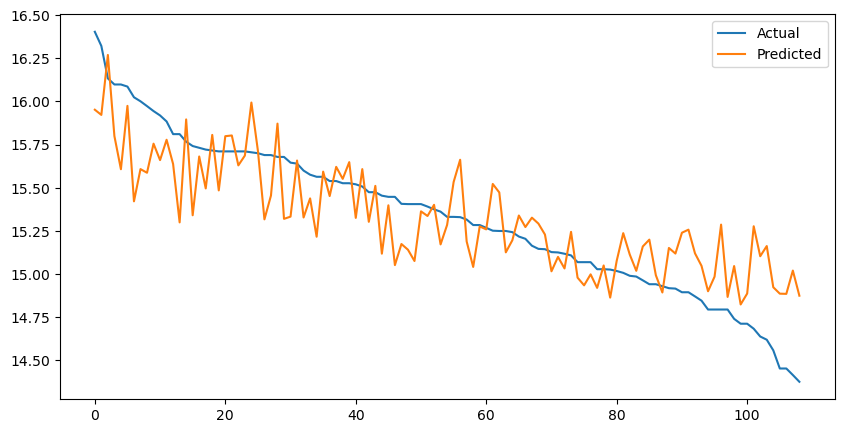

In [35]:
idx = np.argsort(y_test.index)

plt.figure(figsize=(10,5))
plt.plot(y_test.iloc[idx].values, label="Actual")
plt.plot(y_pred[idx], label="Predicted")
plt.legend()
plt.show()

### SVR

In [85]:
svr_model = SVR(C= 1, gamma= 'scale', kernel= 'rbf').fit(x_test,y_test)
svr_model

SVR(C=1)

In [86]:
svr_pred = svr_model.predict(x_test)
svr_pred

array([15.5751049 , 15.6129257 , 15.26671276, 15.45920104, 15.2484015 ,
       15.61942251, 15.5739894 , 15.45752735, 15.0767613 , 14.9490988 ,
       15.57089365, 15.2423967 , 15.19219348, 15.04309092, 15.2507054 ,
       15.17074699, 14.80161412, 15.58355857, 15.57054189, 15.58355384,
       15.46253431, 15.6212658 , 15.17528258, 15.21111727, 15.58752098,
       15.5040421 , 15.04069122, 15.01921394, 15.38619628, 15.01921068,
       15.25759409, 15.04788638, 15.58356239, 15.61678089, 15.41958713,
       15.38619582, 15.39518092, 15.06230781, 15.13470535, 14.96914284,
       15.59983196, 15.17074167, 15.60962595, 15.30253711, 15.62002853,
       15.57375438, 15.5835645 , 15.39401628, 15.59679202, 15.01921056,
       15.61707743, 15.01920901, 15.60810464, 15.36617698, 15.17313723,
       14.99790092, 15.56075977, 14.88249072, 15.61091996, 15.21111101,
       15.06230747, 14.82773239, 15.6104951 , 15.45244141, 15.51404825,
       15.20167932, 15.61634041, 15.0192115 , 15.58011608, 15.55

### Evaluation

In [40]:
mae = mean_absolute_error(y_test,svr_pred)
print('mae -',mae)
r2score = r2_score(y_test,svr_pred)
print('r2 -',r2score)
rmse =root_mean_squared_error(y_test,svr_pred)
print('rmse -',rmse)

mae - 0.28979758602010164
r2 - 0.332988201201065
rmse - 0.35887658293852537


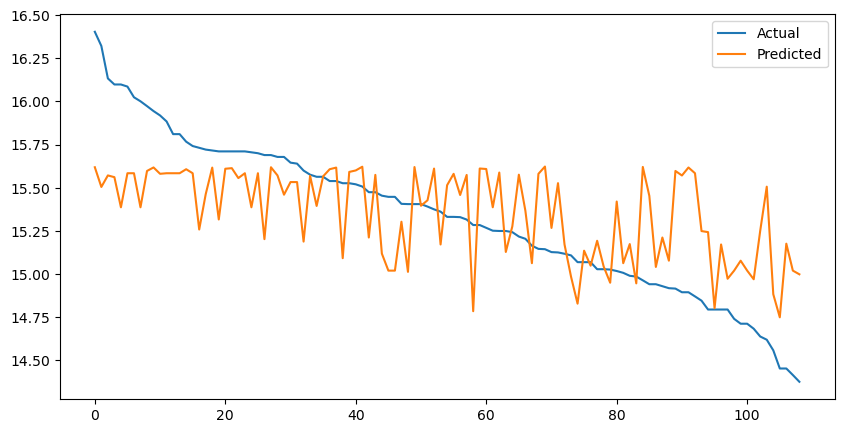

In [87]:
idx = np.argsort(y_test.index)

plt.figure(figsize=(10,5))
plt.plot(y_test.iloc[idx].values, label="Actual")
plt.plot(svr_pred[idx], label="Predicted")
plt.legend()
plt.show()

### Decision Tree

In [88]:
DT = DecisionTreeRegressor()
DT_model = DT.fit(x_train,y_train)
DT_model

DecisionTreeRegressor()

In [89]:
DT_pred = DT_model.predict(x_test)
DT_pred

array([15.65606035, 15.87474952, 15.16358397, 15.25059532, 14.79383706,
       14.81981253, 15.77137118, 15.73096165, 14.68261147, 14.89392048,
       16.32103658, 14.99570314, 15.02745183, 15.10749451, 15.19930204,
       14.6943075 , 15.16358397, 15.36094335, 15.10749451, 15.06827381,
       15.37575844, 15.59890195, 15.06827381, 14.96291333, 15.61059798,
       16.03905255, 15.03781461, 15.51295953, 15.76142085, 15.10749451,
       15.22527752, 15.05822348, 15.63925323, 15.25889412, 15.06827381,
       15.48038337, 15.43291684, 15.25059532, 14.95174003, 15.1726338 ,
       15.20803572, 14.86982294, 15.87474952, 15.24222707, 15.06827381,
       15.36094335, 15.9512144 , 15.06827381, 14.94271063, 15.03781461,
       16.0082809 , 14.43339579, 15.26712462, 15.40474597, 15.25059532,
       14.72578362, 15.79582227, 14.79383706, 15.40474597, 15.02745183,
       15.15445148, 14.79383706, 15.19930204, 15.29301603, 15.05822348,
       15.12465413, 15.59890195, 14.71159899, 14.94271063, 15.47

### Evaluation

In [44]:
mae = mean_absolute_error(y_test,DT_pred)
print('mae -',mae)
r2score = r2_score(y_test,DT_pred)
print('r2 -',r2score)
rmse =root_mean_squared_error(y_test,DT_pred)
print('rmse -',rmse)

mae - 0.24630679985561835
r2 - 0.4843469071543177
rmse - 0.31554200186493386


In [45]:

hyperparameters = {'criterion' : ['squared_error', 'absolute_error'],
                   'max_depth' : np.arange(2,8),
                   'min_samples_split': np.arange(2,8),
                   "min_samples_leaf" : np.arange(2,8)
                  }
dt = DecisionTreeRegressor()
gscv_dt = GridSearchCV(dt , hyperparameters , cv = 10)
gscv_dt_model = gscv_dt.fit(x_train,y_train)
gscv_dt_model 

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

In [46]:
gscv_dt_model.best_params_

{'criterion': 'absolute_error',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [56]:
dt_model = DecisionTreeRegressor(criterion= 'absolute_error',
 max_depth= 5,
 min_samples_leaf= 3,
 min_samples_split= 5)
dt_model

DecisionTreeRegressor(criterion='absolute_error', max_depth=5,
                      min_samples_leaf=3, min_samples_split=5)

In [57]:
best_dt_model = dt_model.fit(x_train,y_train)
best_dt_model


DecisionTreeRegressor(criterion='absolute_error', max_depth=5,
                      min_samples_leaf=3, min_samples_split=5)

In [58]:
dt_new_pred = best_dt_model.predict(x_test)
dt_new_pred

array([15.42594817, 15.64991784, 15.11706396, 15.36094335, 15.25059532,
       15.01692513, 15.36094335, 15.54760866, 14.77255967, 15.25059532,
       15.99649294, 14.96068863, 14.96068863, 15.25059532, 15.19045225,
       14.96068863, 14.89392048, 15.36094335, 15.01692513, 15.25059532,
       15.5858763 , 15.59890195, 14.96068863, 14.96291333, 15.25059532,
       15.54760866, 15.19045225, 15.25059532, 15.76142085, 15.11706396,
       15.25059532, 14.77255967, 15.64991784, 15.25059532, 15.01692513,
       15.82197625, 15.25059532, 15.19045225, 14.96068863, 15.25059532,
       15.25059532, 14.96068863, 15.64991784, 15.32677699, 15.25059532,
       15.36094335, 15.81968975, 15.25059532, 15.01692513, 14.96291333,
       15.82197625, 14.77255967, 15.25059532, 15.25059532, 15.19045225,
       15.25059532, 15.99649294, 14.77255967, 15.25059532, 14.96068863,
       15.11706396, 14.77255967, 15.36094335, 15.36094335, 15.39035723,
       15.32677699, 15.54760866, 15.19045225, 15.01692513, 15.59

### Evaluation

In [59]:
new_mae = mean_absolute_error(y_test,dt_new_pred)
print('mae -',new_mae)
new_r2score = r2_score(y_test,dt_new_pred)
print('r2 -',new_r2score)
rmse =root_mean_squared_error(y_test,dt_new_pred)
print('rmse -',rmse)

mae - 0.2293616891418491
r2 - 0.5279893149694391
rmse - 0.30189385837508154


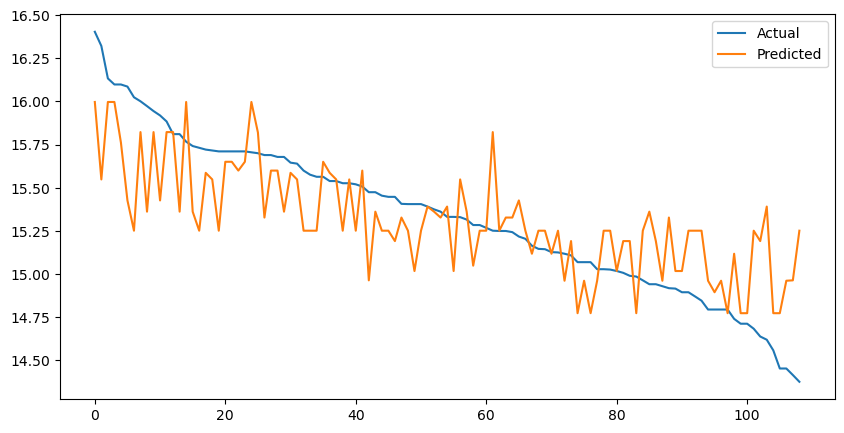

In [90]:
idx = np.argsort(y_test.index)

plt.figure(figsize=(10,5))
plt.plot(y_test.iloc[idx].values, label="Actual")
plt.plot(dt_new_pred[idx], label="Predicted")
plt.legend()
plt.show()

### RandomForest


In [91]:
RF = RandomForestRegressor()
RF_model = RF.fit(x_test,y_test)
RF_model

RandomForestRegressor()

In [92]:
RF_pred = RF_model.predict(x_test)
RF_pred

array([15.41531919, 15.70690214, 15.11738387, 15.61567133, 14.91880298,
       15.24885541, 15.55420032, 15.47293295, 14.78437363, 14.86746849,
       16.12649272, 14.82674683, 15.01827697, 15.11648216, 14.82576474,
       14.92893763, 14.87904928, 15.69632937, 15.14096609, 14.97959166,
       15.66679704, 15.53504042, 14.58953725, 15.31817807, 15.31441609,
       16.11934014, 14.9552459 , 15.33731424, 15.94116658, 14.77429847,
       15.61451365, 14.98101005, 15.73292835, 15.0863963 , 15.15127261,
       15.4192956 , 15.46526979, 15.05158917, 15.06151459, 14.80383326,
       15.43738782, 15.03173603, 15.70746495, 15.34771352, 14.97714271,
       15.31517702, 15.68495035, 15.52056682, 14.99620812, 14.63809741,
       15.93904876, 14.72860415, 15.2190847 , 15.26369773, 14.9294003 ,
       14.63843848, 15.93478032, 14.70295706, 15.31462247, 14.87187947,
       15.11166436, 14.9380494 , 15.36573654, 15.081197  , 15.43753403,
       15.54126409, 15.68112277, 15.21871072, 15.4465562 , 15.76

#### Evaluation

In [93]:
r2score = r2_score(y_test,RF_pred)
print('r2 -',r2score)
mae = mean_absolute_error(y_test,RF_pred)
print('mae -',mae)
rmse =root_mean_squared_error(y_test,RF_pred)
print('rmse -',rmse)

r2 - 0.9300790347106459
mae - 0.091834703536424
rmse - 0.11619356336427139


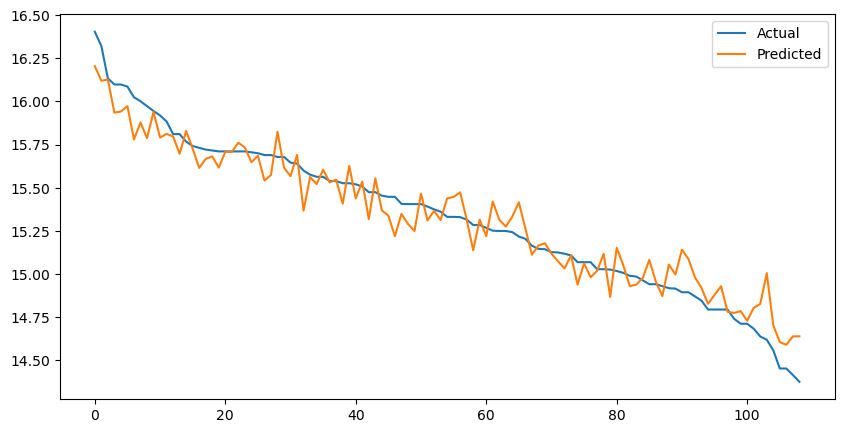

In [94]:
idx = np.argsort(y_test.index)

plt.figure(figsize=(10,5))
plt.plot(y_test.iloc[idx].values, label="Actual")
plt.plot(RF_pred[idx], label="Predicted")
plt.legend()
plt.show()